<a href="https://colab.research.google.com/github/KingJayant/102103556_clustering/blob/main/ASSIGNMENT%202%20AND%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Web scraping, pickle imports
import requests                                 #to make http requests, fetch html contents
from bs4 import BeautifulSoup                   #parsing od html to xml
import pickle

In [3]:
"""
retrieve text from webpage from the given url....request.get() return html of the page
"""

def url_to_transcript(url):
    page = requests.get(url).text                                               #send request to url, text used to retrieve html contents of webpage
    soup = BeautifulSoup(page, "lxml")                                          #parse the content stored in page using parser lxml
    post_content = soup.find(class_="elementor-widget-theme-post-content")
    if post_content:
        text = [p.text for p in post_content]                                   #if post_content exsits, extract the text content of HTML elements within post_content
        print(url)
        return text
    else:
        print(f'No elements with class "post-content" found at {url}')
        return None

In [4]:

urls = ['https://scrapsfromtheloft.com/movies/anyone-but-you-transcript/',
        'https://scrapsfromtheloft.com/movies/the-iron-claw-transcript/',
        'https://scrapsfromtheloft.com/movies/badland-hunters-2024-transcript/'
        ]


In [5]:
movie_names = ["anyone but you" , "the iron claw" , "badland hunters" ]

In [6]:
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/movies/anyone-but-you-transcript/
https://scrapsfromtheloft.com/movies/the-iron-claw-transcript/
https://scrapsfromtheloft.com/movies/badland-hunters-2024-transcript/


In [7]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(movie_names):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [8]:
# Load pickled files
data = {}
for i, c in enumerate(movie_names):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [9]:
data.keys()

dict_keys(['anyone but you', 'the iron claw', 'badland hunters'])

In [10]:
data['anyone but you'][:80]

['\n',
 '\nBea, a law student with doubts about her path, connects instantly with the charming, yet arrogant, Ben on a whirlwind first date. Their passion cools overnight, however, leaving Bea heartbroken and fuming after overhearing Ben’s dismissive remarks to a friend. Years later, fate throws them together at a luxurious Australian wedding, forcing them to share space and endure awkward family gatherings – not helped by the presence of Bea’s persistent ex-fiancé and Ben’s jealous ex-girlfriend.\nIn an attempt to ease the tension and ensure a smooth celebration, the wedding party hatches a mischievous plan: convince everyone Bea and Ben are a happy couple. Despite initial resistance, fuelled by personal motives, both agree to the charade. Bea seeks escape from her ex’s shadow, while Ben hopes to spark jealousy in his old flame.\nAs they navigate the masquerade, participating in romantic couple activities and faking intimate moments, something unexpected happens. The line between pret

In [11]:
#Using MVP Approch(minimum viable product)-start simple and iterate

#Just checking the data dictionary
# Let's take a look at our data again
next(iter(data.keys()))

'anyone but you'

In [12]:
# Notice that our dictionary is currently in key: movie, value: list of text format
next(iter(data.values()))

['\n',
 '\nBea, a law student with doubts about her path, connects instantly with the charming, yet arrogant, Ben on a whirlwind first date. Their passion cools overnight, however, leaving Bea heartbroken and fuming after overhearing Ben’s dismissive remarks to a friend. Years later, fate throws them together at a luxurious Australian wedding, forcing them to share space and endure awkward family gatherings – not helped by the presence of Bea’s persistent ex-fiancé and Ben’s jealous ex-girlfriend.\nIn an attempt to ease the tension and ensure a smooth celebration, the wedding party hatches a mischievous plan: convince everyone Bea and Ben are a happy couple. Despite initial resistance, fuelled by personal motives, both agree to the charade. Bea seeks escape from her ex’s shadow, while Ben hopes to spark jealousy in his old flame.\nAs they navigate the masquerade, participating in romantic couple activities and faking intimate moments, something unexpected happens. The line between pret

In [13]:
def combine_text(list_of_text):
    #Takes list of text and combines it into one large chunk of text
    combined_text=''.join(list_of_text)
    return combined_text

In [15]:
def combine_text(list_of_text):
    # Takes a list of text and combines it into one large chunk of text
    cleaned_text = [str(text) for text in list_of_text if text is not None]
    combined_text = ''.join(cleaned_text)
    return combined_text

    data_combined = {key: [combine_text(value)] for (key, value) in data.items()}


In [16]:
    data_combined

{'anyone but you': ['\n\nBea, a law student with doubts about her path, connects instantly with the charming, yet arrogant, Ben on a whirlwind first date. Their passion cools overnight, however, leaving Bea heartbroken and fuming after overhearing Ben’s dismissive remarks to a friend. Years later, fate throws them together at a luxurious Australian wedding, forcing them to share space and endure awkward family gatherings – not helped by the presence of Bea’s persistent ex-fiancé and Ben’s jealous ex-girlfriend.\nIn an attempt to ease the tension and ensure a smooth celebration, the wedding party hatches a mischievous plan: convince everyone Bea and Ben are a happy couple. Despite initial resistance, fuelled by personal motives, both agree to the charade. Bea seeks escape from her ex’s shadow, while Ben hopes to spark jealousy in his old flame.\nAs they navigate the masquerade, participating in romantic couple activities and faking intimate moments, something unexpected happens. The lin

In [17]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
anyone but you,"\n\nBea, a law student with doubts about her path, connects instantly with the charming, yet arrogant, Ben on a whirlwind first date. Their passio..."
badland hunters,"\n\nBadland Hunters\nOriginal title: Hwang-ya\nYear: 2024\nRunning time: 1h 47m\nGenre: Action, Adventure, Drama\nDirector: Heo Myeong Haeng\nWrit..."
the iron claw,"\n\nThe Iron Claw (2023)\nDirected by: Sean Durkin\nWritten by: Sean Durkin\nStarring: Zac Efron, Jeremy Allen White, Harris Dickinson, Maura Tier..."


In [18]:
# Let's take a look at the transcript for Ali Wong
data_df.transcript.loc['anyone but you']

'\n\nBea, a law student with doubts about her path, connects instantly with the charming, yet arrogant, Ben on a whirlwind first date. Their passion cools overnight, however, leaving Bea heartbroken and fuming after overhearing Ben’s dismissive remarks to a friend. Years later, fate throws them together at a luxurious Australian wedding, forcing them to share space and endure awkward family gatherings – not helped by the presence of Bea’s persistent ex-fiancé and Ben’s jealous ex-girlfriend.\nIn an attempt to ease the tension and ensure a smooth celebration, the wedding party hatches a mischievous plan: convince everyone Bea and Ben are a happy couple. Despite initial resistance, fuelled by personal motives, both agree to the charade. Bea seeks escape from her ex’s shadow, while Ben hopes to spark jealousy in his old flame.\nAs they navigate the masquerade, participating in romantic couple activities and faking intimate moments, something unexpected happens. The line between pretense a

In [19]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [20]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
anyone but you,\n\nbea a law student with doubts about her path connects instantly with the charming yet arrogant ben on a whirlwind first date their passion coo...
badland hunters,\n\nbadland hunters\noriginal title hwangya\nyear \nrunning time \ngenre action adventure drama\ndirector heo myeong haeng\nwriters kim botong kw...
the iron claw,\n\nthe iron claw \ndirected by sean durkin\nwritten by sean durkin\nstarring zac efron jeremy allen white harris dickinson maura tierney holt mcc...


In [21]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[‘’“”…]', '', text)  # Remove special characters
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('\(.*?\)', '', text)  # Remove text within parentheses
    text = re.sub('\s+', ' ', text)  # Remove extra whitespaces
    return text

round2 = lambda x: clean_text_round2(x)

In [22]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
anyone but you,bea a law student with doubts about her path connects instantly with the charming yet arrogant ben on a whirlwind first date their passion cools o...
badland hunters,badland huntersoriginal title hwangyayear running time genre action adventure dramadirector heo myeong haengwriters kim botong kwak jaeminstars ma...
the iron claw,the iron claw directed by sean durkinwritten by sean durkinstarring zac efron jeremy allen white harris dickinson maura tierney holt mccallany lil...


In [23]:
# Let's take a look at our dataframe
data_df

,transcript
anyone but you,"\n\nBea, a law student with doubts about her path, connects instantly with the charming, yet arrogant, Ben on a whirlwind first date. Their passio..."
badland hunters,"\n\nBadland Hunters\nOriginal title: Hwang-ya\nYear: 2024\nRunning time: 1h 47m\nGenre: Action, Adventure, Drama\nDirector: Heo Myeong Haeng\nWrit..."
the iron claw,"\n\nThe Iron Claw (2023)\nDirected by: Sean Durkin\nWritten by: Sean Durkin\nStarring: Zac Efron, Jeremy Allen White, Harris Dickinson, Maura Tier..."


In [24]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [25]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

,ability,able,abondanzacheersnow,aboutand,aboutwell,absolute,absolutely,absolutelythank,acceleratingbirds,acceleratingmotorcycle,...,youyeah,youyeahdont,youyes,youyou,youyoure,youyouve,yungyun,zac,zero,zs
anyone but you,0,1,1,0,2,0,0,0,0,0,...,1,0,1,2,1,1,0,0,1,0
badland hunters,0,11,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
the iron claw,1,2,0,0,0,3,3,1,1,1,...,0,1,0,3,0,1,0,1,0,0


In [26]:
data_dtm.to_pickle("dtm.pkl")

In [27]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [28]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data

,anyone but you,badland hunters,the iron claw
ability,0,0,1
able,1,11,2
abondanzacheersnow,1,0,0
aboutand,0,1,0
aboutwell,2,0,0
...,...,...,...
youyouve,1,0,1
yungyun,0,1,0
zac,0,0,1
zero,1,0,0


In [43]:
#ADDITIONAL ASSIGNMENTS 1
def clean_text_round3(text):
    text = re.sub('–', '', text)#HYPEN REMOVAL
    text = re.sub('\xa0', '', text)
    text = re.sub('[♪]','',text)#MUSICAL NOTE REMOVAL
    text = re.sub('\s+', ' ', text.strip())
    return text

round3 = lambda x: clean_text_round3(x)

In [44]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round3))
data_clean

,transcript
anyone but you,bea a law student with doubts about her path connects instantly with the charming yet arrogant ben on a whirlwind first date their passion cools o...
badland hunters,badland huntersoriginal title hwangyayear running time genre action adventure dramadirector heo myeong haengwriters kim botong kwak jaeminstars ma...
the iron claw,the iron claw directed by sean durkinwritten by sean durkinstarring zac efron jeremy allen white harris dickinson maura tierney holt mccallany lil...


In [45]:
data_clean.transcript.loc['anyone but you']

'bea a law student with doubts about her path connects instantly with the charming yet arrogant ben on a whirlwind first date their passion cools overnight however leaving bea heartbroken and fuming after overhearing bens dismissive remarks to a friend years later fate throws them together at a luxurious australian wedding forcing them to share space and endure awkward family gatherings not helped by the presence of beas persistent exfiancé and bens jealous exgirlfriendin an attempt to ease the tension and ensure a smooth celebration the wedding party hatches a mischievous plan convince everyone bea and ben are a happy couple despite initial resistance fuelled by personal motives both agree to the charade bea seeks escape from her exs shadow while ben hopes to spark jealousy in his old flameas they navigate the masquerade participating in romantic couple activities and faking intimate moments something unexpected happens the line between pretense and reality blurs underneath the bicker

In [47]:
#additional assignment 2
# min_df is the minimum number of documents a word must be present in to be included in the vocabulary.
#Example:- To include word that appears in atleast 3 documents :-
cv = CountVectorizer(min_df=3)

In [48]:
#max_df is the maximum number of documents a word can be present in to be included in the vocabulary.

#Example:- include words that appears in atmost 7 documents :-
cv = CountVectorizer(max_df=7)

In [49]:
# n-gram determines the range of n-grams to consider during the vectorization process. N-Grams create document-adjacent matrix
 # in which columns represent all columns of adjacent words of length n and cells represent count.
cv = CountVectorizer(ngram_range=(1, 2))

In [29]:
#3RD ASSIGNMENT
# Find the top 30 words said in each movie
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'anyone but you': [('just', 91),
  ('know', 84),
  ('im', 71),
  ('like', 65),
  ('dont', 60),
  ('right', 43),
  ('youre', 43),
  ('gonna', 36),
  ('going', 35),
  ('love', 34),
  ('think', 33),
  ('thats', 31),
  ('really', 31),
  ('didnt', 29),
  ('good', 26),
  ('okay', 25),
  ('fuck', 24),
  ('want', 22),
  ('oh', 21),
  ('got', 21),
  ('yeah', 20),
  ('guys', 20),
  ('time', 20),
  ('ben', 20),
  ('did', 18),
  ('way', 18),
  ('look', 17),
  ('wedding', 17),
  ('bea', 17),
  ('little', 17)],
 'badland hunters': [('dont', 52),
  ('just', 45),
  ('come', 44),
  ('right', 30),
  ('im', 30),
  ('like', 30),
  ('going', 28),
  ('oh', 27),
  ('know', 26),
  ('youre', 24),
  ('need', 22),
  ('hey', 20),
  ('lets', 19),
  ('way', 19),
  ('god', 18),
  ('water', 18),
  ('juye', 18),
  ('sure', 17),
  ('make', 17),
  ('care', 16),
  ('gonna', 16),
  ('kill', 16),
  ('okay', 16),
  ('think', 16),
  ('people', 15),
  ('lee', 14),
  ('yang', 13),
  ('world', 13),
  ('look', 13),
  ('uh', 13)

In [30]:
# Print the top 15 words said by each movie
for movie_name, top_words in top_dict.items():
    print(movie_name)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

anyone but you
just, know, im, like, dont, right, youre, gonna, going, love, think, thats, really, didnt
---
badland hunters
dont, just, come, right, im, like, going, oh, know, youre, need, hey, lets, way
---
the iron claw
im, wanna, dont, just, way, come, got, von, kevin, live, world, right, heavyweight, know
---


In [31]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each movie
words = []
for movie_name in data.columns:
    top = [word for (word, count) in top_dict[movie_name]]
    for t in top:
        words.append(t)

words

['just',
 'know',
 'im',
 'like',
 'dont',
 'right',
 'youre',
 'gonna',
 'going',
 'love',
 'think',
 'thats',
 'really',
 'didnt',
 'good',
 'okay',
 'fuck',
 'want',
 'oh',
 'got',
 'yeah',
 'guys',
 'time',
 'ben',
 'did',
 'way',
 'look',
 'wedding',
 'bea',
 'little',
 'dont',
 'just',
 'come',
 'right',
 'im',
 'like',
 'going',
 'oh',
 'know',
 'youre',
 'need',
 'hey',
 'lets',
 'way',
 'god',
 'water',
 'juye',
 'sure',
 'make',
 'care',
 'gonna',
 'kill',
 'okay',
 'think',
 'people',
 'lee',
 'yang',
 'world',
 'look',
 'uh',
 'im',
 'wanna',
 'dont',
 'just',
 'way',
 'come',
 'got',
 'von',
 'kevin',
 'live',
 'world',
 'right',
 'heavyweight',
 'know',
 'forever',
 'gonna',
 'like',
 'youre',
 'oh',
 'want',
 'yeah',
 'kerry',
 'erich',
 'champion',
 'make',
 'david',
 'need',
 'brother',
 'love',
 'hey']

In [32]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('just', 3),
 ('know', 3),
 ('im', 3),
 ('like', 3),
 ('dont', 3),
 ('right', 3),
 ('youre', 3),
 ('gonna', 3),
 ('oh', 3),
 ('way', 3),
 ('going', 2),
 ('love', 2),
 ('think', 2),
 ('okay', 2),
 ('want', 2),
 ('got', 2),
 ('yeah', 2),
 ('look', 2),
 ('come', 2),
 ('need', 2),
 ('hey', 2),
 ('make', 2),
 ('world', 2),
 ('thats', 1),
 ('really', 1),
 ('didnt', 1),
 ('good', 1),
 ('fuck', 1),
 ('guys', 1),
 ('time', 1),
 ('ben', 1),
 ('did', 1),
 ('wedding', 1),
 ('bea', 1),
 ('little', 1),
 ('lets', 1),
 ('god', 1),
 ('water', 1),
 ('juye', 1),
 ('sure', 1),
 ('care', 1),
 ('kill', 1),
 ('people', 1),
 ('lee', 1),
 ('yang', 1),
 ('uh', 1),
 ('wanna', 1),
 ('von', 1),
 ('kevin', 1),
 ('live', 1),
 ('heavyweight', 1),
 ('forever', 1),
 ('kerry', 1),
 ('erich', 1),
 ('champion', 1),
 ('david', 1),
 ('brother', 1)]

In [33]:
# If more than half of the movies have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [34]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [35]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords='english', background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


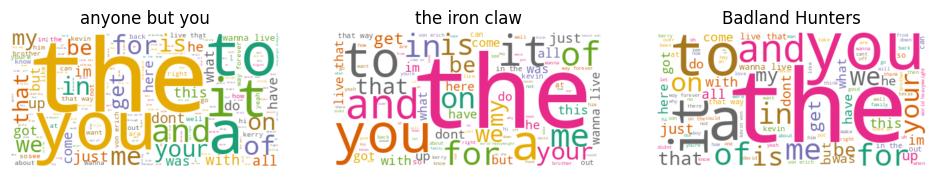

In [36]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

movie_names = ["anyone but you" , "the iron claw" , "Badland Hunters" ]

# Create subplots for each movies
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[movie_name])

    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(movie_names[index])

plt.show()

In [37]:
# Find the number of unique words that each movie uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for movie in data.columns:
    uniques = data[movie].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(movie_names, unique_list)), columns=['movie_name', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,movie_name,unique_words
1,the iron claw,2020
0,anyone but you,2170
2,Badland Hunters,2548


In [38]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('just', 3),
 ('know', 3),
 ('im', 3),
 ('like', 3),
 ('dont', 3),
 ('right', 3),
 ('youre', 3),
 ('gonna', 3),
 ('oh', 3),
 ('way', 3),
 ('going', 2),
 ('love', 2),
 ('think', 2),
 ('okay', 2),
 ('want', 2),
 ('got', 2),
 ('yeah', 2),
 ('look', 2),
 ('come', 2),
 ('need', 2),
 ('hey', 2),
 ('make', 2),
 ('world', 2),
 ('thats', 1),
 ('really', 1),
 ('didnt', 1),
 ('good', 1),
 ('fuck', 1),
 ('guys', 1),
 ('time', 1),
 ('ben', 1),
 ('did', 1),
 ('wedding', 1),
 ('bea', 1),
 ('little', 1),
 ('lets', 1),
 ('god', 1),
 ('water', 1),
 ('juye', 1),
 ('sure', 1),
 ('care', 1),
 ('kill', 1),
 ('people', 1),
 ('lee', 1),
 ('yang', 1),
 ('uh', 1),
 ('wanna', 1),
 ('von', 1),
 ('kevin', 1),
 ('live', 1),
 ('heavyweight', 1),
 ('forever', 1),
 ('kerry', 1),
 ('erich', 1),
 ('champion', 1),
 ('david', 1),
 ('brother', 1)]

In [39]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fight',  'shit']]
data_profanity = pd.concat([data_bad_words.fight , data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
anyone but you,2,8
badland hunters,1,6
the iron claw,10,0


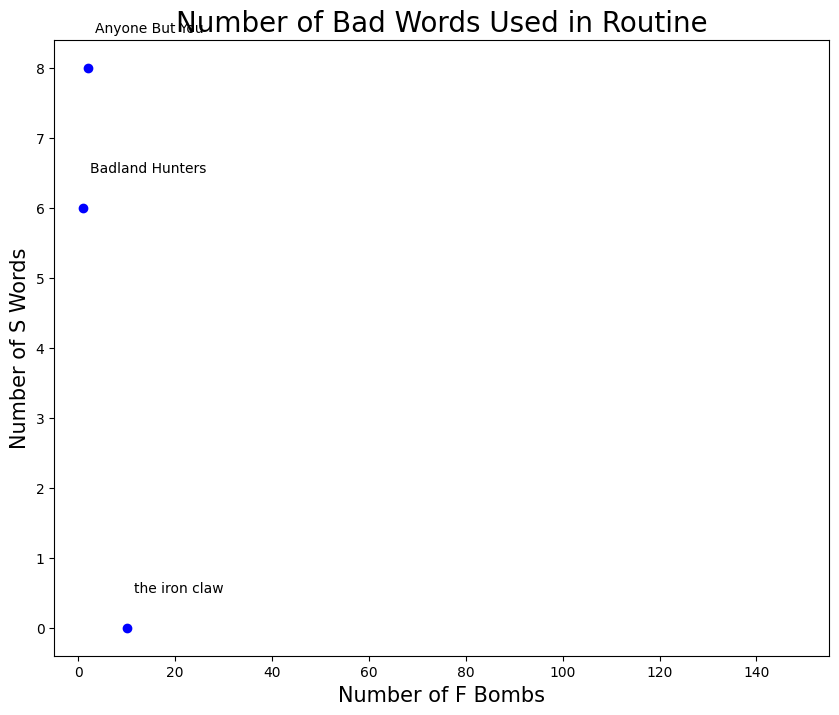

In [40]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

movie_names = ['Anyone But You' ,
'Badland Hunters'	,
'the iron claw'	]

for i, movie in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[movie]
    y = data_profanity.s_word.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, movie_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

In [55]:
### Assignment 4:(optional)
#What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [52]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['love', 'hate', 'hello']]
data_profanity = pd.concat([data_bad_words.love + data_bad_words.hate, data_bad_words.hello], axis=1)
data_profanity.columns = ['l_word', 'h_word']
data_profanity

,l_word,h_word
anyone but you,38,0
badland hunters,0,2
the iron claw,17,2


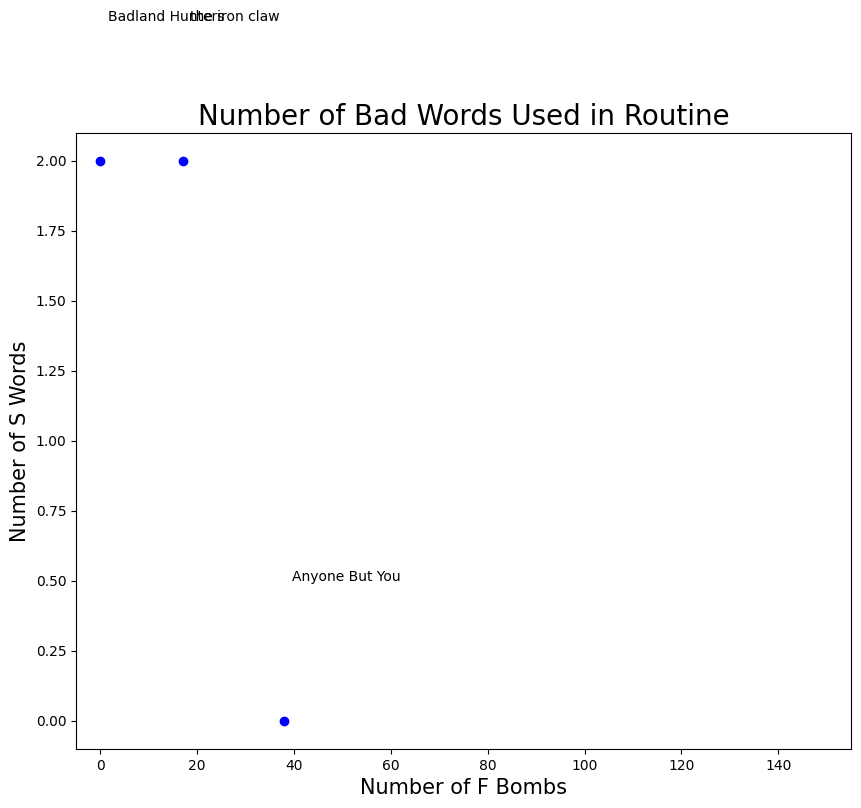

In [53]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

movie_names = ['Anyone But You' ,
'Badland Hunters'	,
'the iron claw'	]

for i, movie in enumerate(data_profanity.index):
    x = data_profanity.l_word.loc[movie]
    y = data_profanity.h_word.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, movie_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()